In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns

In [2]:
dns_logs = pd.read_csv('/kaggle/input/hardware-analytics/Benign and malicious domains based on DNS logs/BenignAndMaliciousDataset.csv')
print(f"number of features: {len(dns_logs.columns)}")

number of features: 34


Features: 

Domain: The full domain name being analyzed (e.g., example.com).

DNSRecordType: Type of DNS record (e.g., A, AAAA, MX, TXT) associated with the domain.

MXDnsResponse: Response content from the domain's Mail Exchange (MX) DNS lookup.

TXTDnsResponse: Response content from the domain's TXT DNS lookup (e.g., SPF, DKIM).

HasSPFInfo: Boolean indicating if the domain has SPF (Sender Policy Framework) records set.

HasDkimInfo: Boolean indicating if the domain has DKIM (DomainKeys Identified Mail) records.

HasDmarcInfo: Boolean indicating if the domain has a DMARC (Domain-based Message Authentication) record.

Ip: IP address associated with the domain.

DomainInAlexaDB: Boolean or score indicating if the domain is listed in the Alexa Top Sites database.

CommonPorts: Count or list of commonly open ports found on the domain’s server (via OSINT).

CountryCode: Two-letter ISO code representing the geolocation of the IP/server.

RegisteredCountry: Country in which the domain is registered.

CreationDate: The original registration date of the domain.

LastUpdateDate: The most recent update or modification date of the domain record.

ASN: Autonomous System Number associated with the IP address.

HttpResponseCode: HTTP status code returned when accessing the domain.

RegisteredOrg: Name of the organization that registered the domain.

SubdomainNumber: Number of subdomains associated with the main domain.

Entropy: Measure of randomness or unpredictability in the domain name string.

EntropyOfSubDomains: Entropy calculated specifically for subdomains.

StrangeCharacters: Number of uncommon or non-alphanumeric characters in the domain.

TLD: Top-Level Domain (e.g., .com, .org, .net) of the domain.

IpReputation: Security reputation score of the IP (e.g., from threat intelligence).

DomainReputation: Reputation score of the domain name itself.

ConsoantSequence: Longest sequence of consecutive consonants in the domain.

NumericRatio: Ratio of numeric characters in the domain name.

SpecialCharRatio: Ratio of special characters (e.g., _, -) in the domain name.

VowelRatio: Ratio of vowels in the domain name.

ConsoantSequence (Duplicate): (Already listed above—likely an error or redundant).

VowelSequence: Longest sequence of consecutive vowels in the domain.

SpecialCharSequence: Longest sequence of consecutive special characters.

DomainLength: Total length of the domain name string.

Class: Target label — 0 for non-malicious, 1 for malicious.



In [3]:
dns_logs

,Domain,DNSRecordType,MXDnsResponse,TXTDnsResponse,HasSPFInfo,HasDkimInfo,HasDmarcInfo,Ip,DomainInAlexaDB,CommonPorts,...,ConsoantRatio,NumericRatio,SpecialCharRatio,VowelRatio,ConsoantSequence,VowelSequence,NumericSequence,SpecialCharSequence,DomainLength,Class
0,4455,A,False,False,False,False,False,16984,False,False,...,0.6,0.1,0.0,0.2,10,4,1,0,134,1
1,4456,A,False,False,False,False,False,16984,False,False,...,0.7,0.1,0.0,0.2,12,2,2,1,123,1
2,4457,A,False,False,False,False,False,16984,False,False,...,0.6,0.2,0.0,0.2,16,2,3,0,150,1
3,4458,A,False,False,False,False,False,16984,False,False,...,0.6,0.1,0.0,0.1,9,1,2,0,122,1
4,4459,A,False,False,False,False,False,16984,False,False,...,0.6,0.2,0.0,0.1,10,2,2,0,151,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,75661,A,False,False,False,False,False,16984,False,False,...,0.5,0.2,0.0,0.2,4,1,2,0,27,0
89996,54843,A,False,False,False,False,False,16984,False,False,...,0.6,0.0,0.0,0.4,3,2,0,0,26,0
89997,71235,A,False,False,False,False,False,16984,False,False,...,0.5,0.1,0.0,0.4,3,2,2,0,31,0
89998,82994,A,True,True,True,False,False,7723,False,False,...,0.5,0.0,0.0,0.4,4,2,0,0,11,0


Using 1 + log2(n) where n is the number of data points hence 1 + log2(90,000) = aprox. 17

array([[<Axes: title={'center': 'Domain'}>,
        <Axes: title={'center': 'Ip'}>,
        <Axes: title={'center': 'CreationDate'}>,
        <Axes: title={'center': 'LastUpdateDate'}>],
       [<Axes: title={'center': 'ASN'}>,
        <Axes: title={'center': 'HttpResponseCode'}>,
        <Axes: title={'center': 'SubdomainNumber'}>,
        <Axes: title={'center': 'Entropy'}>],
       [<Axes: title={'center': 'EntropyOfSubDomains'}>,
        <Axes: title={'center': 'StrangeCharacters'}>,
        <Axes: title={'center': 'ConsoantRatio'}>,
        <Axes: title={'center': 'NumericRatio'}>],
       [<Axes: title={'center': 'SpecialCharRatio'}>,
        <Axes: title={'center': 'VowelRatio'}>,
        <Axes: title={'center': 'ConsoantSequence'}>,
        <Axes: title={'center': 'VowelSequence'}>],
       [<Axes: title={'center': 'NumericSequence'}>,
        <Axes: title={'center': 'SpecialCharSequence'}>,
        <Axes: title={'center': 'DomainLength'}>,
        <Axes: title={'center': 'Clas

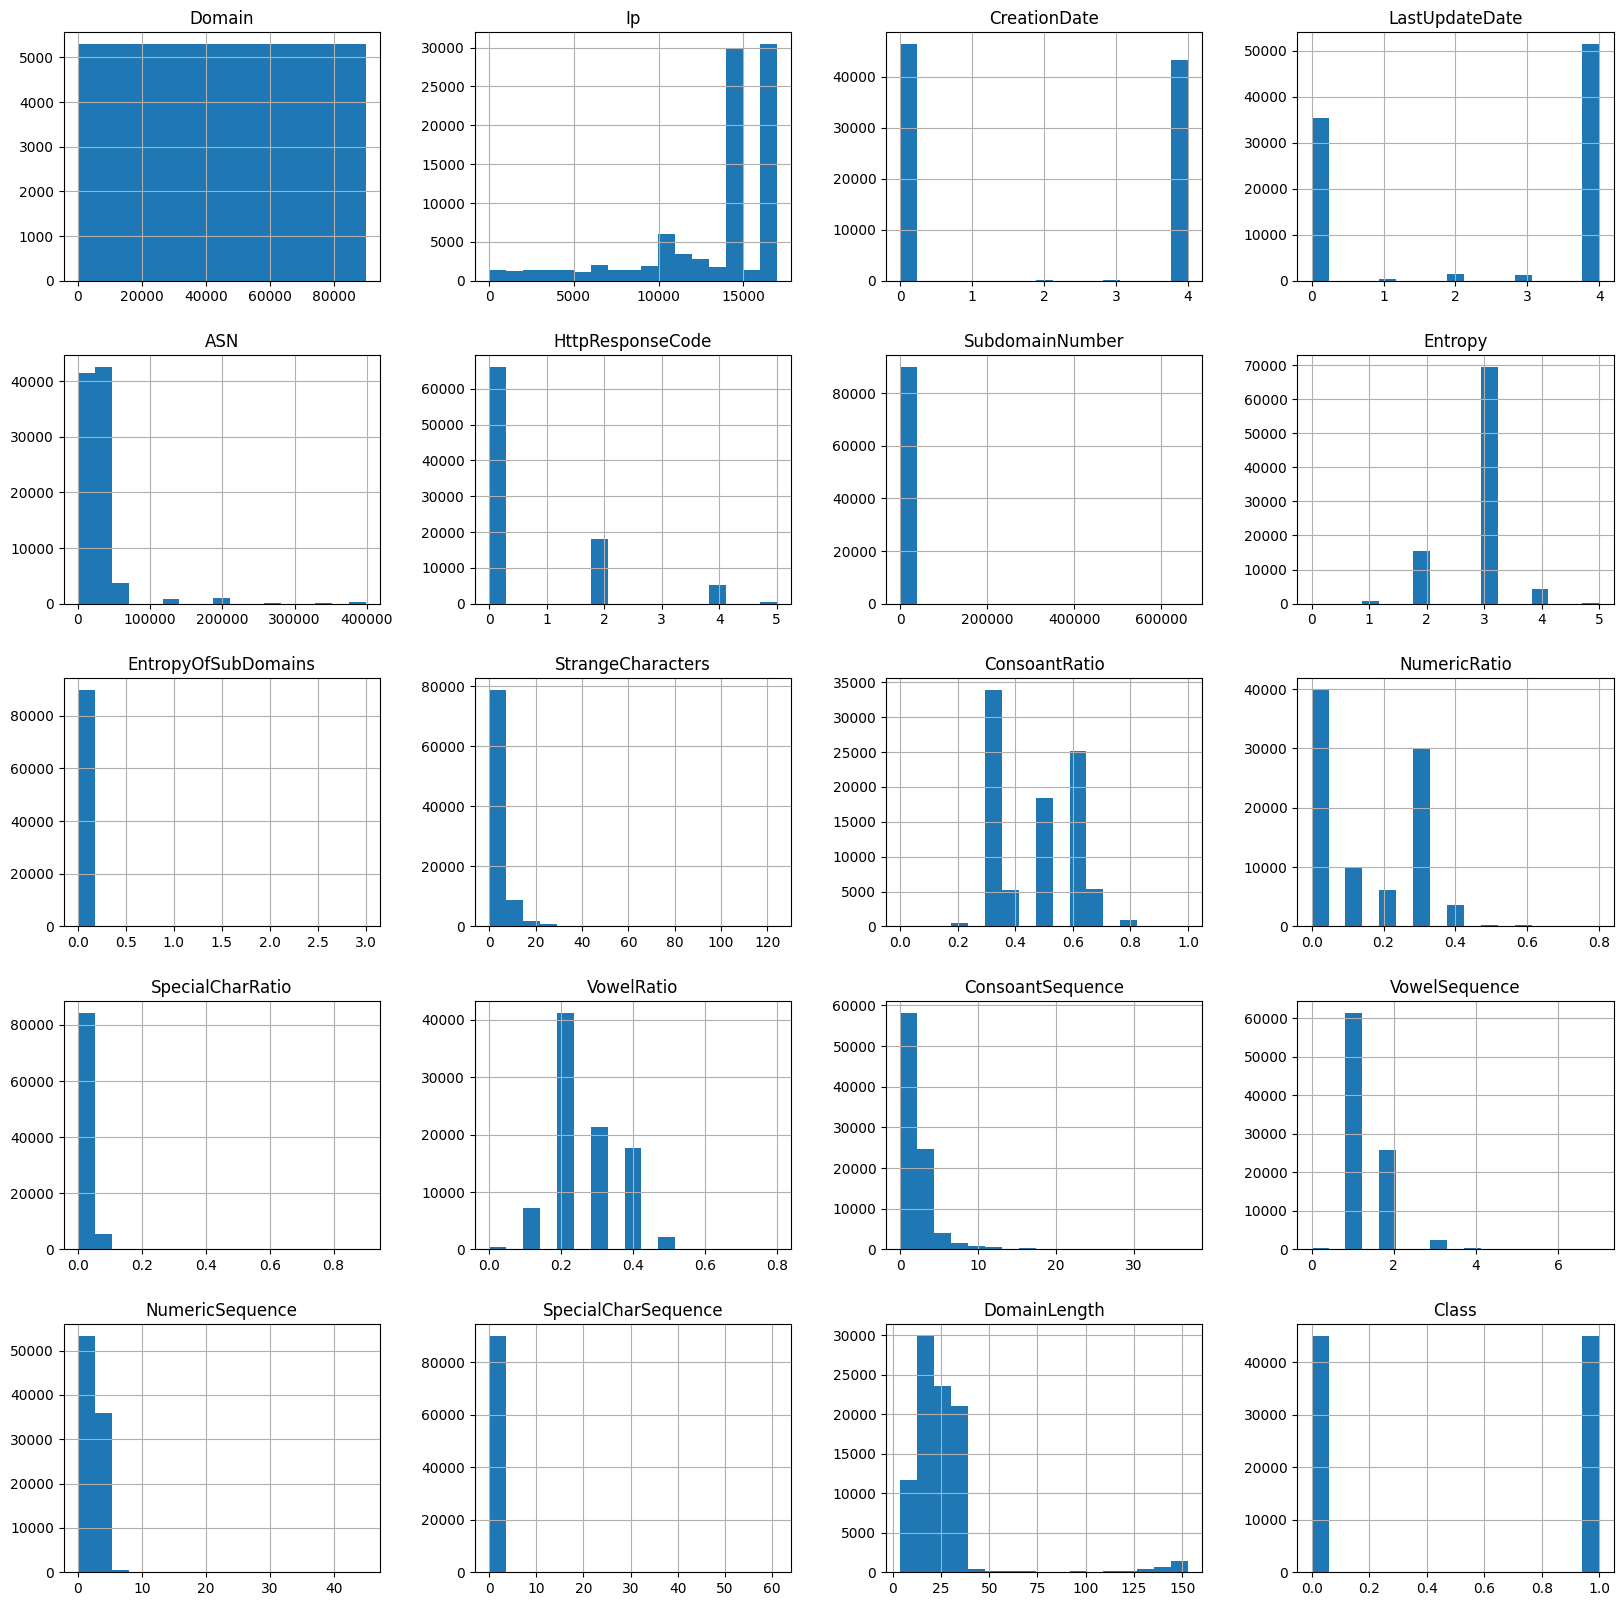

In [4]:
dns_logs.hist(bins=17, figsize=(20,20))

In [5]:
dns_logs.isna().sum()

Domain                     0
DNSRecordType              0
MXDnsResponse              0
TXTDnsResponse             0
HasSPFInfo                 0
HasDkimInfo                0
HasDmarcInfo               0
Ip                         0
DomainInAlexaDB            0
CommonPorts                0
CountryCode            29052
RegisteredCountry      77774
CreationDate               0
LastUpdateDate             0
ASN                        0
HttpResponseCode           0
RegisteredOrg          35391
SubdomainNumber            0
Entropy                    0
EntropyOfSubDomains        0
StrangeCharacters          0
TLD                      170
IpReputation               0
DomainReputation           0
ConsoantRatio              0
NumericRatio               0
SpecialCharRatio           0
VowelRatio                 0
ConsoantSequence           0
VowelSequence              0
NumericSequence            0
SpecialCharSequence        0
DomainLength               0
Class                      0
dtype: int64

Null values in these parts make sense, as country codes may not be send, same for registered orgs and countries. TLD N/A values can be kept since they are valid. Duplicate column needs to get removed.

In [6]:
if dns_logs.columns.duplicated().any():
    dns_logs = dns_logs.loc[:, ~dns_logs.columns.duplicated()]
print(f"number of features: {len(dns_logs.columns)}")

number of features: 34


In [7]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Drop raw string columns not useful for ML
# droplist = ['Domain', 'Ip', 'MXDnsResponse', 'TXTDnsResponse', 'RegisteredOrg']
# #Safer method for removing columns
# dns_logs = dns_logs.drop(columns=[col for col in drop_cols if col in dns_logs.columns])
# no longer necessary - fixed encoding error

# Convert dates to datetime, then extract numeric features
for date_col in ['CreationDate', 'LastUpdateDate']:
    if date_col in dns_logs.columns:
        dns_logs[date_col] = pd.to_datetime(dns_logs[date_col], errors='coerce')
        dns_logs[date_col + '_Year'] = dns_logs[date_col].dt.year
        dns_logs[date_col + '_Month'] = dns_logs[date_col].dt.month
        dns_logs[date_col + '_Day'] = dns_logs[date_col].dt.day
        dns_logs = dns_logs.drop(columns=date_col)

# Encode remaining categorical columns
categorical_cols = dns_logs.select_dtypes(include=['object', 'string']).columns

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    dns_logs[col] = dns_logs[col].fillna("Unknown")
    dns_logs[col] = le.fit_transform(dns_logs[col])
    label_encoders[col] = le  # store encoder if needed for inverse transform later

In [8]:
from sklearn.model_selection import train_test_split

X = dns_logs.drop(columns=['Class'])
y = dns_logs['Class']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Check for overfitting

Random Forest Accuracy: 99.98148148148148
Random Forest F1 Score: 99.98164531404868
Random Forest execution time:  3.616793394088745 secs


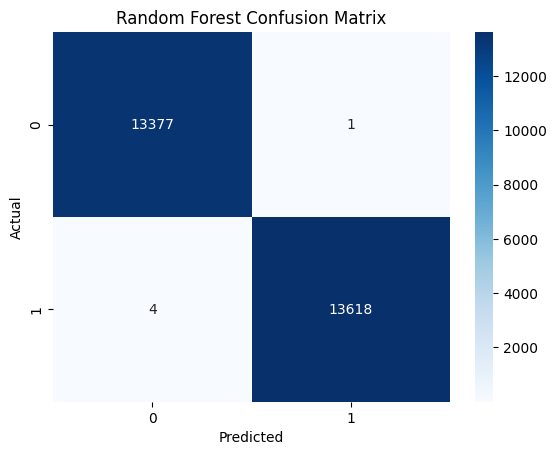

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import time

start_time = time.time()

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)
rf_preds = rf_model.predict(x_test)

end_time = time.time()

print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds)*100)
print("Random Forest F1 Score:", f1_score(y_test, rf_preds)*100)
print("Random Forest execution time: ", end_time - start_time,"secs")

sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Naive Bayes Accuracy: 93.67407407407407
Naive Bayes F1 Score: 93.59964026081092
Naive Bayes execution time: 0.11506986618041992 secs


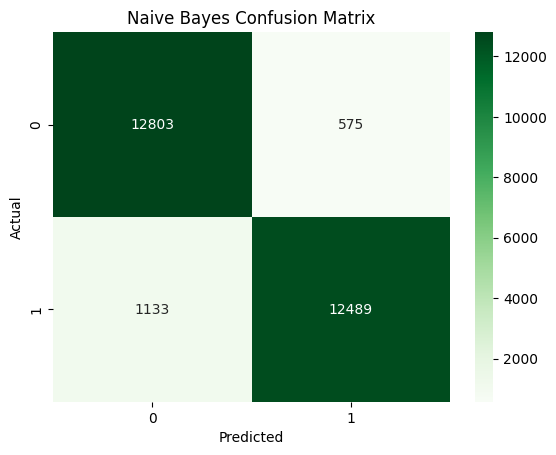

In [10]:
from sklearn.naive_bayes import GaussianNB

start_time = time.time()

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
nb_preds = nb_model.predict(x_test)

end_time = time.time()

print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_preds)*100)
print("Naive Bayes F1 Score:", f1_score(y_test, nb_preds)*100)
print("Naive Bayes execution time:", end_time - start_time,"secs")

sns.heatmap(confusion_matrix(y_test, nb_preds), annot=True, fmt="d", cmap="Greens")
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


GMM Accuracy: 57.13333333333333
GMM F1 Score: 68.50269417079411
GMM execution time:  3.142435312271118 secs


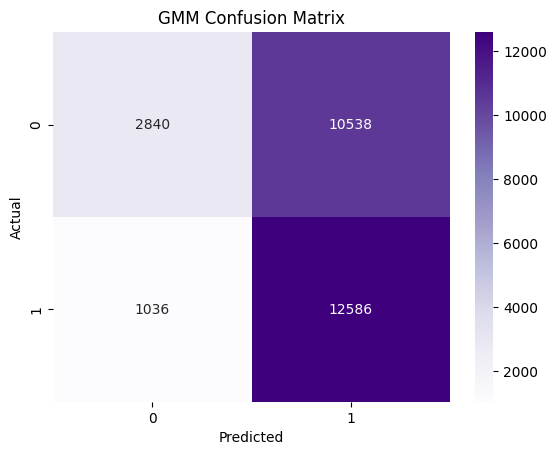

In [11]:
from sklearn.mixture import GaussianMixture
from scipy.stats import mode
import numpy as np

start_time = time.time()

gmm_model = GaussianMixture(n_components=2, random_state=42)
gmm_model.fit(x_train)

train_clusters = gmm_model.predict(x_train)
test_clusters = gmm_model.predict(x_test)

mapping = {}
for cluster_id in np.unique(train_clusters):
    label = mode(y_train[train_clusters == cluster_id], keepdims=True).mode[0]
    mapping[cluster_id] = label

gmm_preds = np.vectorize(mapping.get)(test_clusters)

end_time = time.time()

print("GMM Accuracy:", accuracy_score(y_test, gmm_preds)*100)
print("GMM F1 Score:", f1_score(y_test, gmm_preds)*100)
print("GMM execution time: ", end_time - start_time,"secs")

sns.heatmap(confusion_matrix(y_test, gmm_preds), annot=True, fmt="d", cmap="Purples")
plt.title("GMM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [15]:
# Training predictions
rf_train_preds = rf_model.predict(x_train)

# Accuracy and F1 on training set
train_accuracy = accuracy_score(y_train, rf_train_preds) * 100
train_f1 = f1_score(y_train, rf_train_preds) * 100

# Already computed test metrics:
test_accuracy = accuracy_score(y_test, rf_preds) * 100
test_f1 = f1_score(y_test, rf_preds) * 100

# Print train vs test performance
print(f"Training Accuracy: {train_accuracy}%")
print(f"Test Accuracy:     {test_accuracy}%")
print(f"Training F1 Score: {train_f1:}%")
print(f"Test F1 Score:     {test_f1:}%")


Training Accuracy: 100.0%
Test Accuracy:     99.98148148148148%
Training F1 Score: 100.0%
Test F1 Score:     99.98164531404868%
